In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.model_selection import train_test_split

## Load Dataset 

In [2]:
df_full_feature = pd.read_csv('../Dataset/Murni/processed_dataset_10.csv',sep=',')
df_chi_square = pd.read_csv('../Dataset/Murni/processed_dataset_chi_square.csv', sep=',')
df_feature_selection = pd.read_csv('../Dataset/Murni/processed_dataset_5.csv',sep=',')
df_slice = pd.read_csv('../Dataset/Murni/processed_dataset_slice.csv',sep=',')

## Splitting Features And Label

In [3]:
# Dataset Full Feature
full_feature_x = df_full_feature[df_full_feature.columns[:9]]
full_feature_y = df_full_feature['label']

full_feature_x.head(5)

,src,dst,Protocol,pktrate,pktperflow,dur,dur_nsec,bytecount,pktcount
0,0.0,16.0,3,451,13535,100,716000000,48294064,45304
1,0.0,16.0,3,451,13531,280,734000000,134737070,126395
2,10.0,16.0,3,451,13534,200,744000000,96294978,90333
3,10.0,16.0,3,451,13534,200,744000000,96294978,90333
4,10.0,16.0,3,451,13534,200,744000000,96294978,90333


In [4]:
# Dataset Chi Square 
chi_square_x = df_chi_square[df_chi_square.columns[:5]]
chi_square_y = df_chi_square['label']

chi_square_x.head(5)

,dst,src,Protocol,pktcount,pktcount.1
0,16.0,0.0,3,45304,45304
1,16.0,0.0,3,126395,126395
2,16.0,10.0,3,90333,90333
3,16.0,10.0,3,90333,90333
4,16.0,10.0,3,90333,90333


In [5]:
# Dataset Feature Selection
feature_selection_x = df_feature_selection[df_feature_selection.columns[:5]]
feature_selection_y = df_feature_selection['label']

feature_selection_x.head(5)

,pktrate,pktperflow,Protocol,src,dst
0,451,13535,3,0.0,16.0
1,451,13531,3,0.0,16.0
2,451,13534,3,10.0,16.0
3,451,13534,3,10.0,16.0
4,451,13534,3,10.0,16.0


In [6]:
# Dataset Slice
slice_x = df_slice[df_slice.columns[:4]]
slice_y= df_slice['label']

slice_x.head(5)

,dst,src,Protocol,bytecount
0,16.0,0.0,3,48294064
1,16.0,0.0,3,134737070
2,16.0,10.0,3,96294978
3,16.0,10.0,3,96294978
4,16.0,10.0,3,96294978


### Full Features Model

In [7]:
#Splitting Data 

x_train,x_test,y_train,y_test = train_test_split(full_feature_x,full_feature_y,test_size=0.30,random_state=6)

In [9]:
classifier = DecisionTreeClassifier(max_depth=9)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9)

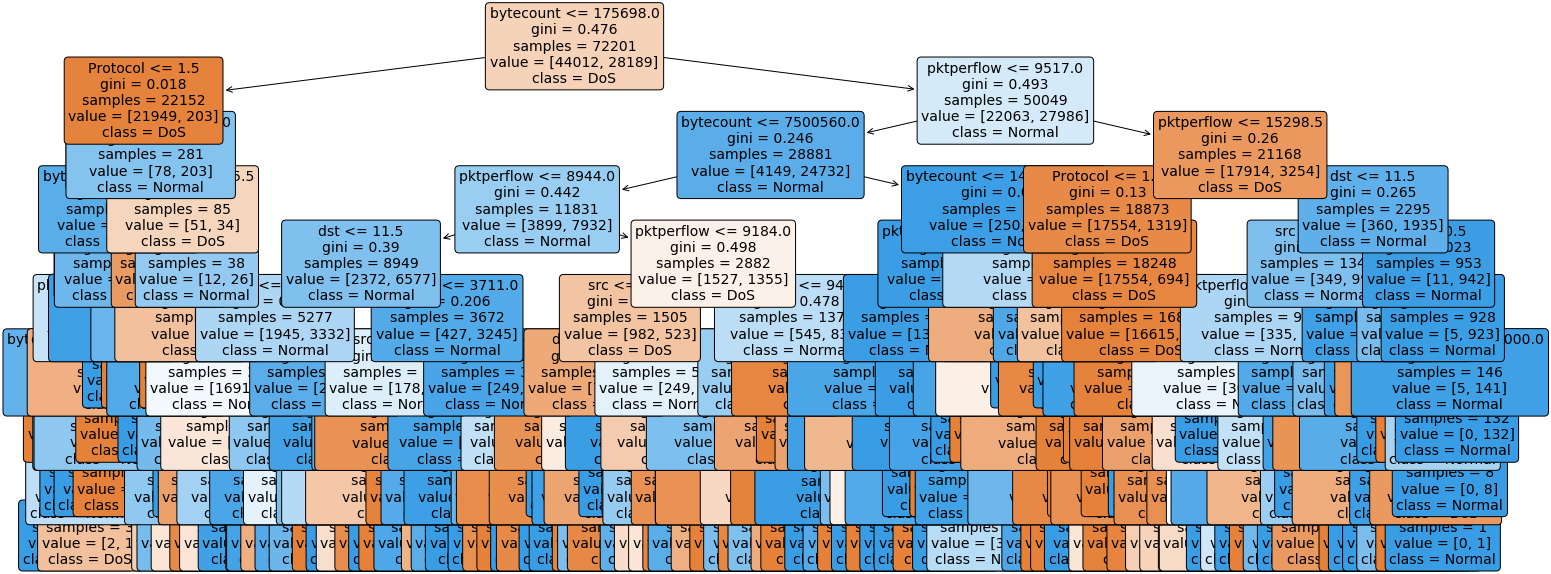

In [12]:
plt.figure(figsize=(25,20))
a = tree.plot_tree(classifier, 
              feature_names=x_train.columns, 
              class_names=['DoS','Normal'],
              filled=True, 
              rounded=True, 
              fontsize=14)

In [13]:
y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)

In [14]:
import warnings
warnings.filterwarnings('ignore')
y_pred_train = [np.argmax(element) for element in y_pred_train]
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
print("Accuracy:",accuracy_score(y_train, y_pred_train)*100)


[[44012     0]
 [28189     0]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.76     44012
           1       0.00      0.00      0.00     28189

    accuracy                           0.61     72201
   macro avg       0.30      0.50      0.38     72201
weighted avg       0.37      0.61      0.46     72201

Accuracy: 60.95760446531211


In [15]:
warnings.filterwarnings('ignore')
y_pred_test = [np.argmax(element) for element in y_pred_test]
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print("Accuracy:",accuracy_score(y_test, y_pred_test)*100)

[[18783     0]
 [12161     0]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.76     18783
           1       0.00      0.00      0.00     12161

    accuracy                           0.61     30944
   macro avg       0.30      0.50      0.38     30944
weighted avg       0.37      0.61      0.46     30944

Accuracy: 60.69997414684592
